# Python Filter Test
- Band Pass Filter Process
- Block Process
- Overlap add Process
- FIR Filter Process Test



In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time
import math
import platform

# Import Audio
import wave
import pyaudio
import librosa

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt
import soundfile

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter



In [2]:
# .wav File Open

#############################################################################
#  Impulse Data Load -------------------------------------------------------#
#############################################################################

impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')     # Path of audiofiles folder

# IMPULSE WAVE FILE
#wav_fname_impulse = "TyndallBruceMonument.wav"
#wav_fname_impulse = "ElvedenHallMarbleHall.wav'"
#wav_fname_impulse = "EmptyApartmentBedroom.wav"
#wav_fname_impulse = "FalklandPalaceRoyalTennisCourt.wav"
#wav_fname_impulse = "InsidePiano.wav"
#wav_fname_impulse = "MaesHowe.wav"
#wav_fname_impulse = "SportsCentreUniversityOfYork.wav"
#wav_fname_impulse = "StairwayUniversityOfYork.wav"
#wav_fname_impulse = "StAndrewsChurch.wav"
wav_fname_impulse = "mh3_000_ortf_48k.wav"

impulse_fname = os.path.join(impulse_dir, wav_fname_impulse)  #path + filename

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

##############################################################################
#  AUDIO Data Load ----------------------------------------------------------#
##############################################################################

audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# TEST AUDIO WAVE FILE
wav_fname_audio = "adult_female_speech.wav"
#wav_fname_audio = "bagpipe_music.wav"
#wav_fname_audio = "bagpipe_steady_chord.wav"
#wav_fname_audio = "flute_arpeggio.wav"
#wav_fname_audio = "flute_music.wav"
#wav_fname_audio = "tuba_arpeggio.wav"
#wav_fname_audio = "tuba_music.wav"

audio_fname = os.path.join(audio_dir, wav_fname_audio)  #path + filename

audio_fmt_chunk = pyOssWavfile.read_format(audio_fname)
audio_struct_fmt = pyOssWavfile.extractWavFmtChunk(audio_fmt_chunk)

if audio_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    audio_data, audio_struct_fmt.fs = soundfile.read(audio_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    audio_fmt_chunk, audio_data, audio_length = pyOssWavfile.read(audio_fname)

audio_time = audio_data.shape[0] / audio_struct_fmt.fs



AttributeError: cffi library 'C:\Users\iMacPC\anaconda3\Library\bin\sndfile.dll' has no function, constant or global variable named 'sf_wchar_open'

11312 22624
0.99


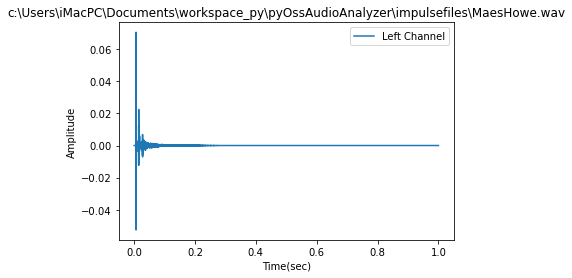

impulse_T60= [[0.359]] impulse_T60 nonLin= [[0.1]]
impulse_EDT= [[0.42]] impulse_EDT nonLin= [[4.2]]
impulse_T10= [[0.07]] impulse_T10 nonLin=EDT= [[4.2]]
impulse_T20= [[0.372]] , impulse_T20 nonLin= [[0.1]]
impulse_T30= [[0.368]] , impulse_T30 nonLin= [[0.1]]


In [3]:
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]
num = 0

# for fc in array_fc:
#     band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
#     impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=5)
#     impulse_decaycurve = room.decayCurve(impulse_data_filtered[:,0], impulse_time, impulse_struct_fmt.fs)
#     impulse_t60, impulse_t60nonLin = room.T60(impulse_decaycurve, impulse_struct_fmt.fs) 
#     dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, impulse_fname, "Left Channel", "Time(sec)", "Amplitude")
#     num = num + 1

# for fc in array_fc:
#     band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
#     audio_data_filtered = pyOssFilter.bandpass_filter(audio_data[:,0], band_f1, band_f2, audio_struct_fmt.fs, order=5)
#     dbg.dPlotAudio(audio_struct_fmt.fs, audio_data_filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")
#     num = num + 1

band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(16000)
impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=5)
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, impulse_fname, "Left Channel", "Time(sec)", "Amplitude")

impulse_decaycurve = room.decayCurve(impulse_data_filtered, impulse_time, impulse_struct_fmt.fs)
impulse_t60, impulse_t60nonLin = room.T60(impulse_decaycurve, impulse_struct_fmt.fs) 
impulse_EDT, impulse_EDTnonLin = room.EDT(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t20, impulse_t20nonLin = room.T20(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t30, impulse_t30nonLin = room.T30(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t20, impulse_t20nonLin = room.T20(impulse_decaycurve, impulse_struct_fmt.fs)
impulse_t30, impulse_t30nonLin = room.T30(impulse_decaycurve, impulse_struct_fmt.fs)
print("impulse_T60=", impulse_t60, "impulse_T60 nonLin=", impulse_t60nonLin)            # for Debug
print("impulse_EDT=", impulse_EDT, "impulse_EDT nonLin=", impulse_EDTnonLin)            # for Debug
print("impulse_T10=", impulse_EDT/6, "impulse_T10 nonLin=EDT=", impulse_EDTnonLin)      # for Debug
print("impulse_T20=", impulse_t20, ", impulse_T20 nonLin=", impulse_t20nonLin)          # for Debug
print("impulse_T30=", impulse_t30, ", impulse_T30 nonLin=", impulse_t30nonLin)          # for Debug




In [7]:
# FIR Filter Test
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]

# FIR Bandpass Fitler Design
firtab = 128

for i in len(array_fc):
    for fc in array_fc:
        oss_f1[i,:], oss_f2[i,:] = pyOssFilter.bp_cf_to_band_range(fc)

oss_f1, oss_f2 = pyOssFilter.bp_cf_to_band_range(500)

print(oss_f1, oss_f2)

coef_fir1 = sig.firwin(firtab, [oss_f1, oss_f2], pass_zero=False, fs=audio_struct_fmt.fs)

filtered = sig.lfilter(coef_fir1, [1.0], audio_data[:,0])
dbg.dPlotAudio(audio_struct_fmt.fs, filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")
#coef_fir2 = sig.firwin2(firtab)



TypeError: 'int' object is not iterable

In [5]:
# FFT Test

In [6]:
CHUNK = 1024
BUFFER = CHUNK * 4




